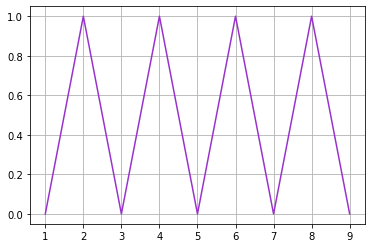

游戏退出...


error: display Surface quit

In [1]:
# 群体模拟退火
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
from Game import *

game = Game(288, 512)
n = 50
m = 10
q = 0.9
weights = []
scores = []
epoch = 1
fitness = np.zeros(n)
T = 1e10
Tm = 1e-30
# 随机形成初始解
for i in range(n):
    weights.append(np.random.random(3 * m + (m + 1) * 2))

while T >= Tm:
    new_weights = []
    # 对解进行扰动
    for w in weights:
        new_weights.append(w + (np.random.random()-0.5) * 0.05)
    game.partial_init()
    game.optimization_init(n, m, weights=new_weights)
    new_fitness, _ = game.optimization_run(epoch)
    scores.append(game.score)
    fitness_idx = np.where(new_fitness < fitness)[0]
    for i in fitness_idx:
        if np.exp((fitness[i] - new_fitness[i]) / T) <= np.random.rand():
            new_weights[i] = weights[i]
            new_fitness[i] = fitness[i]
    weights = new_weights
    fitness = new_fitness
    epoch += 1
    T *= q
    clear_output()
    plt.grid()
    plt.plot([i+1 for i in range(epoch-1)], scores, c='#9932CC')
    plt.show()
